# Statistical Methods in Engineering Project - Task 1
Name: Samarth Chetan <br>
NUID: 002780999 <br>
Email: chetan.s@northeastern.edu



**Task 1 - Analysis of Variance**

Dataset - https://www.kaggle.com/datasets/mercheovejero/theory-of-mind-in-remitted-bipolar-disorder

In [ ]:
# importing necessary libraries to carry out two-way ANOVA analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

**Exploring the dataset**

In [ ]:
# storing the dataset in a variable called 'df2'
df2 = pd.read_csv('Behavioral_Dataset.csv', sep = ';')

In [ ]:
# displaying the head
df2.head()

,Group,Type,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
0,Bipolar,BD I,47,40,9,11,9,11,18,22,23,17
1,Bipolar,BD I,49,49,13,13,11,12,24,25,24,25
2,Bipolar,BD I,45,43,9,11,13,10,21,22,24,19
3,Bipolar,BD I,53,44,10,10,12,12,25,19,24,20
4,Bipolar,BD II,50,50,14,13,11,12,23,27,23,27


In [ ]:
# displaying the information contained in the dataset
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Group             277 non-null    object
 1   Type              277 non-null    object
 2   Age               277 non-null    int64 
 3   Right_answers     277 non-null    int64 
 4   Audio_prosody     277 non-null    int64 
 5   Combined_channel  277 non-null    int64 
 6   Face_video        277 non-null    int64 
 7   Body_video        277 non-null    int64 
 8   Positive_valence  277 non-null    int64 
 9   Negative_valence  277 non-null    int64 
 10  Dominant          277 non-null    int64 
 11  Submissive        277 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 26.1+ KB


(277, 12)

In [ ]:
# describing the dataset
df2.describe()

,Age,Right_answers,Audio_prosody,Combined_channel,Face_video,Body_video,Positive_valence,Negative_valence,Dominant,Submissive
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,48.718412,47.079422,11.425993,12.339350,11.794224,11.519856,23.555957,23.523466,23.454874,23.624549
std,12.452524,5.231680,2.122800,1.931903,1.693199,1.912147,3.215893,3.132981,3.125796,3.033003
min,21.000000,28.000000,3.000000,6.000000,8.000000,5.000000,13.000000,10.000000,12.000000,13.000000
25%,39.000000,44.000000,10.000000,11.000000,11.000000,10.000000,22.000000,22.000000,22.000000,22.000000
50%,50.000000,47.000000,12.000000,12.000000,12.000000,12.000000,24.000000,24.000000,24.000000,24.000000
75%,58.000000,51.000000,13.000000,14.000000,13.000000,13.000000,26.000000,26.000000,26.000000,26.000000
max,78.000000,58.000000,16.000000,16.000000,15.000000,16.000000,30.000000,30.000000,31.000000,30.000000


**Missing values**

In [ ]:
# confirming that the dataframe does not have any missing values
df2.isnull().sum()

Group               0
Type                0
Age                 0
Right_answers       0
Audio_prosody       0
Combined_channel    0
Face_video          0
Body_video          0
Positive_valence    0
Negative_valence    0
Dominant            0
Submissive          0
dtype: int64

**Grouping necessary features and feature-values**

In [ ]:
# getting the different types of values and their counts in 'Group' column
df2['Group'].value_counts()

Bipolar    119
Control    119
UD          39
Name: Group, dtype: int64

In [ ]:
# getting the different types of values and their counts in 'Type' column
df2['Type'].value_counts()

Control    119
BD I        70
BD II       49
UD          39
Name: Type, dtype: int64

In [ ]:
# convert unique values and their counts of the 'Group' feature
groups = df2["Group"].unique().tolist()

# storing the length of groups
K = len(groups)

# storing the total number of observations in the variable 'n'
n = df2.shape[0]

# getting numbers of observation within each group
n_group = df2["Group"].value_counts().values.tolist()


In [ ]:
# grouping by the values and storing in the variable 'gb'
gb = df2.groupby(['Group'])
gb.agg({'Right_answers' : ['count', 'min', 'max', 'mean', 'std']})

Right_answers                             
                count min max       mean       std
Group                                             
Bipolar           119  28  56  45.352941  4.795104
Control           119  39  58  50.235294  3.704569
UD                 39  32  53  42.717949  4.973343

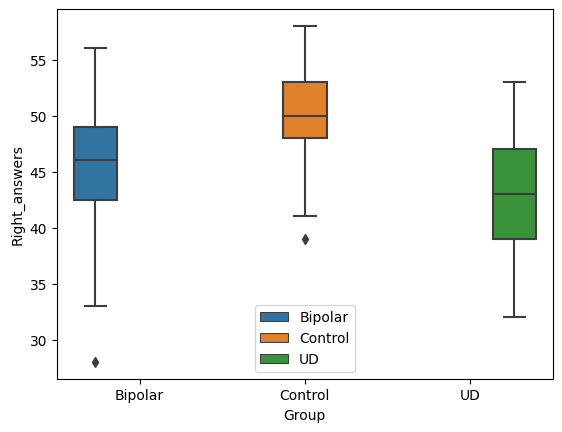

In [ ]:
# creating a box-plot of the variables contained in 'Group'
g = sns.boxplot(data = df2, x = "Group", y = 'Right_answers', hue = df2.Group.to_list())
plt.show()

**Performing ANOVA**

In [ ]:
# fitting a two-way ANOVA model on the data which is specified by the 'typ' parameter being set to 2
formula = 'Right_answers ~ C(Group) + C(Type) + C(Group):C(Type)'
model = ols(formula, df2).fit()
anova_table = anova_lm(model, typ = 2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1917: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [ ]:
# displaying the ANOVA table
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
                        sum_sq     df             F        PR(>F)
C(Group)                   NaN    2.0           NaN           NaN
C(Type)           1.999899e-13    3.0  3.456627e-15  1.000000e+00
C(Group):C(Type)  6.504463e+03    6.0  5.621160e+01  3.594888e-21
Residual          5.264983e+03  273.0           NaN           NaN


In [ ]:
# exploring various cases with respect to 'Group' and 'Type' features
if anova_table['PR(>F)']['C(Group)'] < 0.05:
    print("Main effect of Group is significant.")
if anova_table['PR(>F)']['C(Type)'] < 0.05:
    print("Main effect of Type is significant.")
if anova_table['PR(>F)']['C(Group):C(Type)'] < 0.05:
    print("Interaction effect between Group and Type is significant.")

Interaction effect between Group and Type is significant.


**ANOVA Decomposition Components (Sum of Squares)**

In [ ]:
# storing the mean value of the 'Right_answers' feature in the variable 'mean_value'
mean_value = df2['Right_answers'].mean()

In [ ]:
# calculating Total Sum of Squares (SST)
sst = ((df2['Right_answers'] - mean_value) ** 2).sum()
print(f"\nTotal Sum of Squares (SST): {sst}")


Total Sum of Squares (SST): 7554.252707581227


In [ ]:
# calculating Sum of Squares Between (SSB)
ssb = (len(df2['Group'].unique()) * len(df2['Type'].unique())) * ((model.params['C(Group)[T.UD]'] - mean_value) ** 2)
print(f"Sum of Squares Between (SSB): {ssb}")

Sum of Squares Between (SSB): 27518.810687595353


In [ ]:
# calculating Sum of Squares Within (SSW)
ssw = ((df2['Right_answers'] - model.fittedvalues) ** 2).sum()
print(f"Sum of Squares Within (SSW): {ssw}")

Sum of Squares Within (SSW): 5264.982669991074


**Post-hoc test - Tukey's Honestly Significant Difference (HSD)**

In [ ]:
# performing the post-hoc test
tukey_result = pairwise_tukeyhsd(df2['Right_answers'], df2['Group'].astype(str) + df2['Type'].astype(str), alpha=0.05)

In [ ]:
# displaying the results of the post-hoc test
print("\nTukey's HSD Post-Hoc Analysis:")
print(tukey_result)


Tukey's HSD Post-Hoc Analysis:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
   BipolarBD I   BipolarBD II   0.5102 0.9244 -1.6042  2.6246  False
   BipolarBD I ControlControl   5.0924    0.0  3.3825  6.8023   True
   BipolarBD I           UDUD  -2.4249 0.0309 -4.6932 -0.1566   True
  BipolarBD II ControlControl   4.5822    0.0  2.6554  6.5091   True
  BipolarBD II           UDUD  -2.9351 0.0109 -5.3711 -0.4991   True
ControlControl           UDUD  -7.5173    0.0 -9.6119 -5.4228   True
--------------------------------------------------------------------


**Additional visualizations**

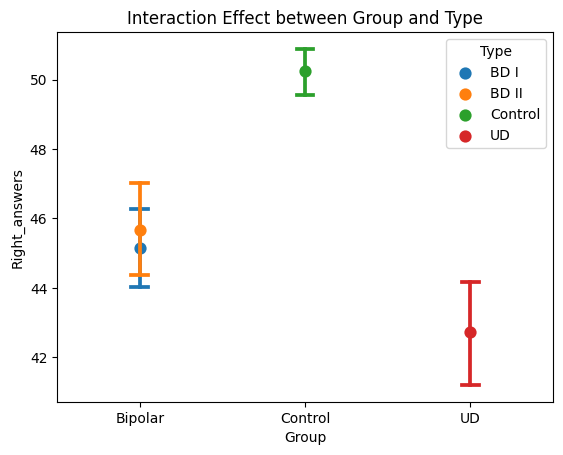

In [ ]:
# creating a point plot for 'Group' and 'Type' interactions
sns.pointplot(data = df2, x = 'Group', y = 'Right_answers', hue = 'Type', capsize = 0.1)
plt.title("Interaction Effect between Group and Type")
plt.show()

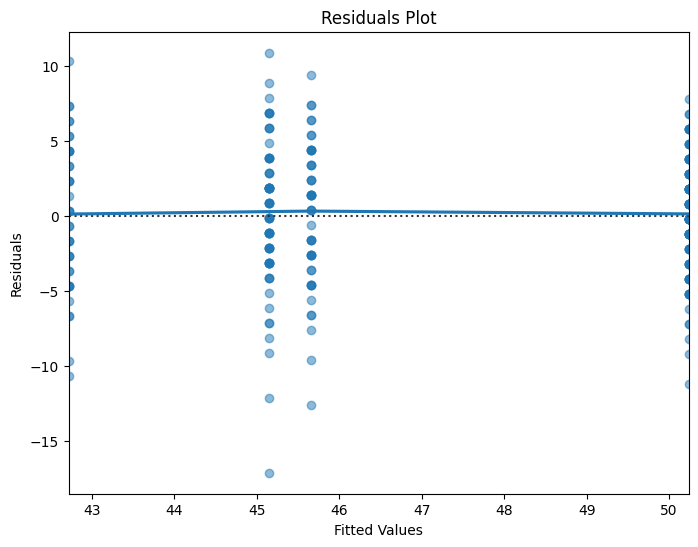

In [ ]:
# creating a residuals plot
plt.figure(figsize = (8, 6))
sns.residplot(x = model.fittedvalues, y = model.resid, lowess = True, scatter_kws = {'alpha': 0.5})
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

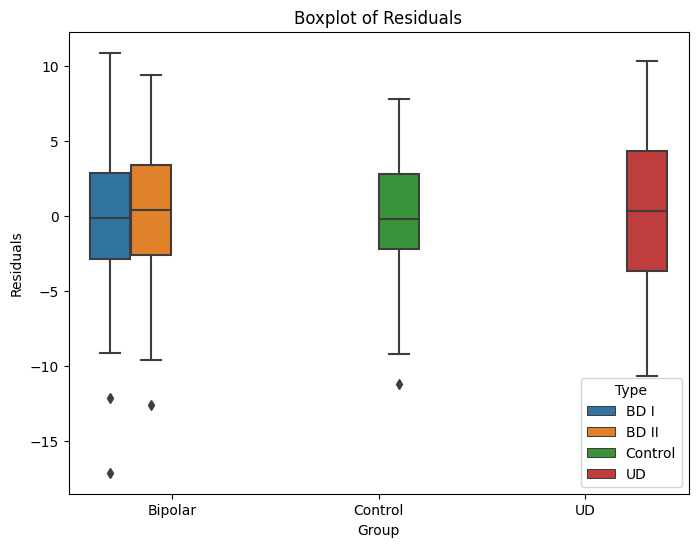

In [ ]:
# creating a boxplot of Residuals
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['Group'], y=model.resid, hue=df2['Type'])
plt.title('Boxplot of Residuals')
plt.xlabel('Group')
plt.ylabel('Residuals')
plt.show()

**Conclusion** <br>
In conclusion, this analysis provides valuable insights into the Theory of Mind in remitted bipolar disorder, highlighting significant differences between groups and types. The findings contribute to our understanding of interpersonal accuracy in recognizing dynamic nonverbal signals among individuals with bipolar disorder.